In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv('Wine.txt',sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
X = df.iloc[:,1:].copy()
target = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

In [6]:
# 1. Standardize the data
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))

C:\Users\miani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\miani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\miani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [7]:
# 2. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X_train,axis=0).values.reshape(13,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 


mu_k = []

for i,orchid in enumerate(np.unique(df['target'])):
    mu_k.append(np.mean(X_train.where(df['target']==orchid),axis=0))
mu_k = np.array(mu_k).T

In [8]:
# 3. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df['target'])):
    a = np.array(X_train.where(df['target']==orchid).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['target']==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

In [9]:
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

In [10]:
# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest

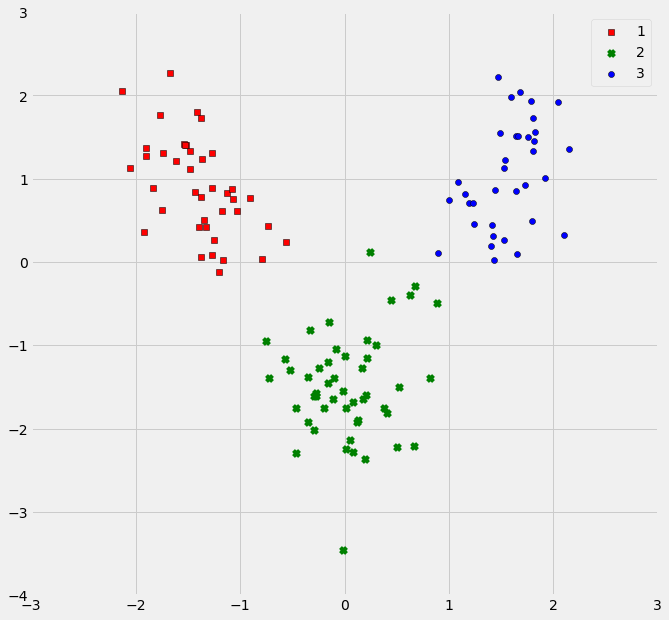

In [11]:
# 6. Transform the data with Y=X*w
Y = X_train.dot(w)

# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')